# 6.1 정렬 알고리즘

* 정렬이란?
<br> : 키(key)를 항목값의 대소 관계에 따라 데이터 집합을 일정한 순서로 바꾸어 늘어놓는 작업
<br> : 데이터를 정렬하면 더 쉽게 검색할 수 있다는 장점이 있다.
<br> : 작은 데이터를 앞쪽으로 늘어놓는 것 => 오름차순(ascending) 정렬
<br> : 큰 데이터를 뒷쪽에 늘어놓는 것 => 내림차순(descending) 정렬

정렬 알고리즘은 
1. 안정적인 알고리즘
2. 불안정적인 알고리즘

으로 나눌 수 있다.

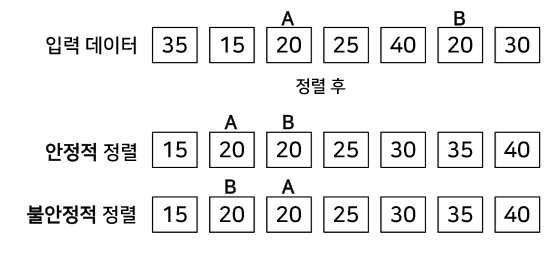

위의 그림에서 처럼 안정적인 정렬은 값이 같은 원소의 순서가 정렬한 후에도 유지된다. <br> 반면 불안정적인 정렬은 정렬된 후에도 원소의 순서가 같게 유지된다고 보장할 수 없다. 

>내부 정렬(internal sorting) : 정렬할 모든 데이터를 하나의 배열에 저장할 수 있는 경우에 사용
<br> 외부 정렬(external sorting) : 정렬할 데이터가 많아서 하나의 배열에 저장할 수 없는 경우에 사용

**"정렬 알고리즘의 핵심은 교환, 선택, 삽입이다."**

#6.2 버블 정렬

버블 정렬(bubble sort)이란?
<br> 이웃한 두 원소의 대소 관계를 비교하여 필요에 따라 교환을 반복하는 알고리즘 (단순 교환 정렬)


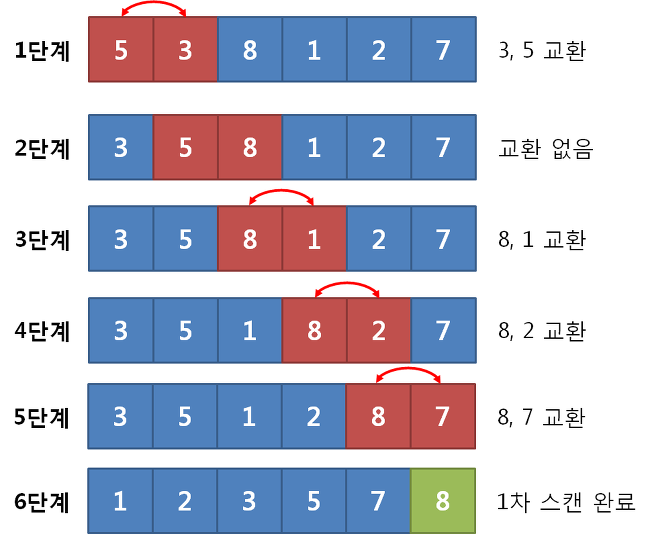

**'원소 수가 n개'**인 배열에서 이웃하는 원소를 **'비교'**하고, 필요하면 **'교환'**하는 과정을 <br>**'n-1번'** 거쳐 가장 작은 원소를 제일 앞(오름차순일 때)으로 보낸다.
> 이러한 일련의 비교,교환하는 과정을 **패스(pass)**라고 한다.
<br> 위의 과정은 버블 정렬의 첫번째 패스를 나타낸다.

패스를 한 번 수행할 때마다 정렬할 대상은 1개씩 줄어든다.
<br> 그러므로 총 패스 횟수는 $(n-1)+(n-2)+\dots+2+1 = \frac{n(n-1)}{2}$이므로
<br> **버블 정렬의 시간 복잡도는 $O(n^2)$** 이다. (등차수열의 합 공식 사용)

In [ ]:
# 실습 6-1
# 버블 정렬 알고리즘 구현하기

from typing import MutableSequence      # 가변 시퀀스형

def bubble_sort(a: MutableSequence) -> None:
    """버블 정렬"""
    n = len(a)
    for i in range(n - 1):
        for j in range(n - 1, i, -1):       # 뒤에서부터 비교 시작(인덱스가 0부터 시작한다는걸 잊지말자)
            if a[j - 1] > a[j]:
                a[j - 1], a[j] = a[j], a[j - 1]     # 변경 필요하면 인덱스 바꿔서 변경해주기

if __name__ == '__main__':
    print('버블 정렬을 수행합니다.')
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num  # 입력한 수만큼 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}] : '))

    bubble_sort(x)  # 배열 x를 버블 정렬

    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

In [ ]:
for i in range(7, 0, -1):
    print(i)

*NOTE*
<br> collections.MutableSequence 은 가변 시퀀스형을 뜻한다.
<br> 말 그대로 변경할 수 있는 시퀀스형(eg.리스트)을 말한다.

In [ ]:
# 실습 6-2
# 버블 정렬 알고리즘 구현(정렬 과정을 출력)

from typing import MutableSequence

def bubble_sort_verbose(a: MutableSequence) -> None:
    """버블 정렬(정렬 과정을 출력)"""
    ccnt = 0  # 비교 횟수
    scnt = 0  # 교환 횟수
    n = len(a)
    for i in range(n - 1):
        print(f'패스 {i + 1}')      # 몇번째 패스인지 표시
        for j in range(n - 1, i, -1):       # 뒤에서부터 정렬 시작
            for m in range(0, n - 1):
               print(f'{a[m]:2}' + ('  ' if m != j - 1 else                 # 삼항 연산자  # 현재 주목하는 원소가 아닐경우  
                                    ' +' if a[j - 1] > a[j] else ' -'),     # 교환할 경우 +표시, 하지 않을 경우 -표시
                                    end='')
            print(f'{a[n - 1]:2}')      # 교환 필요한지 안한지 표시 후,
            ccnt += 1                   # 비교 횟수 추가해주고,
            if a[j - 1] > a[j]:         # 교환 필요한 조건을 만족하면,
                scnt += 1               # 교환 횟수 추가해주고,
                a[j - 1], a[j] = a[j], a[j - 1]     # 교환해줌
        for m in range(0, n - 1):
           print(f'{a[m]:2}', end='  ')
        print(f'{a[n - 1]:2}')
    print(f'비교를 {ccnt}번 했습니다.')     # +와 -표시 개수
    print(f'교환을 {scnt}번 했습니다.')     # +표시 개수

if __name__ == '__main__':
    print('버블 정렬을 수행합니다.')
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num  # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))

    bubble_sort_verbose(x)  # 배열 x를 버블 정렬

    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

버블 정렬을 수행합니다.
원소 수를 입력하세요.: 5
x[0]: 2
x[1]: 7
x[2]: 5
x[3]: 6
x[4]: 1
패스 1
 2   7   5   6 + 1
 2   7   5 + 1   6
 2   7 + 1   5   6
 2 + 1   7   5   6
 1   2   7   5   6
패스 2
 1   2   7   5 - 6
 1   2   7 + 5   6
 1   2 - 5   7   6
 1   2   5   7   6
패스 3
 1   2   5   7 + 6
 1   2   5 - 6   7
 1   2   5   6   7
패스 4
 1   2   5   6 - 7
 1   2   5   6   7
비교를 10번 했습니다.
교환을 6번 했습니다.
오름차순으로 정렬했습니다.
x[0] = 1
x[1] = 2
x[2] = 5
x[3] = 6
x[4] = 7


위에서 보여준 버블 정렬 구현은 작동하긴 하지만 원소의 개수가 많아지면 시간이 오래 걸릴 것이다.

이미 정렬을 마친 상태라면 그 이후의 패스는 원소 교환을 하지 않는 중단 방식을 적용하면 시간을 단축 할 수 있다.

즉, 어떤 패스의 원소 교환 횟수가 0이면 모든 원소가 정렬을 완료한 경우이므로 <br>그 이후의 패스는 불필요하다 판단하여 정렬을 중단하는 방법을 적용해보자.

In [ ]:
# 실습 6-3
# 버블 정렬 알고리즘 구현하기(알고리즘의 개선 1)
# 중단 방식을 적용

from typing import MutableSequence

def bubble_sort(a: MutableSequence) -> None:
    """버블 정렬(교환 횟수에 따른 중단)"""
    n = len(a)
    for i in range(n - 1):  # 바꾸는 횟수는 (총 원소 갯수-1)번
        exchng = 0  # 패스에서 교환 횟수
        for j in range(n - 1, i, -1):   # 뒤에서부터 앞 방향으로 비교 시작
            if a[j - 1] > a[j]:     # 앞에 원소가 더 크면
                a[j - 1], a[j] = a[j], a[j - 1]  # 서로 위치 바꿔주고
                exchng += 1     # 교환 횟수 증가시킴
        if exchng == 0:     # 교환 횟수=0이면 중단
            break   

if __name__ == "__main__":
    print("버블 정렬을 수행합니다")
    num = int(input("원소 수를 입력하세요.: "))
    x = [None] * num        # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f"x[{i}]: "))

    bubble_sort(x)  # 배열 x를 버블 정렬

    print("오름차순으로 정렬했습니다.")
    for i in range(num):
        print(f"x[{i}] = {x[i]}")

버블 정렬을 수행합니다
원소 수를 입력하세요.: 5
x[0]: 6
x[1]: 3
x[2]: 8
x[3]: 1
x[4]: 5
오름차순으로 정렬했습니다.
x[0] = 1
x[1] = 3
x[2] = 5
x[3] = 6
x[4] = 8


알고리즘의 개선1: 중단 방식을 사용하면 불필요한 비교를 하지 않으므로 비교횟수가 줄어든다.

만약 한 패스에서 비교/교환을 하다가 어떤 특정한 원소 이후에 교환하지 않는다면 그 원소보다 앞쪽에 있는 원소는 이미 정렬을 마친 상태이다.

이 말은 즉, 한 패스 내에서 마지막 교환 이후의 정렬이 불필요하다는 것이므로 다음 번의 패스에서도 이 이후의 정렬은 필요하지 않다.

이미 정렬된 원소를 제외한 나머지만 비교,교환하도록 **스캔 범위를 제한하는 방식**을 적용하여 프로그램을 개선해보자.

In [ ]:
# 실습 6-4
# 버블 정렬 알고리즘 구현하기(알고리즘의 개선 2)
# 스캔 범위를 제한하는 방식을 적용

from typing import MutableSequence

def bubble_sort(a: MutableSequence) -> None:
    """버블 정렬(스캔 범위를 제한)"""
    n = len(a)
    k = 0
    while k < n - 1:
        last = n - 1
        for j in range(n - 1, k, -1):   # 맨 뒤에서부터 k번째까지로 스캔 범위 제한
            if a[j - 1] > a[j]:
                a[j - 1], a[j] = a[j], a[j - 1]
                last = j    # 교환할때마다 오른쪽 원소의 인덱스를 last 변수에 저장
        k = last    # 한 패스의 마지막 교환의 오른쪽 원소의 인덱스를 k로 지정함으로써
                    # 다음 패스의 스캔 범위를 n-1(맨끝)부터 a[k]로 제한한다.

if __name__ == '__main__':
    print('버블 정렬을 합니다.')
    num = int(input('원솟수를 입력하세요.: '))
    x = [None] * num    # 원소수 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}] : '))

    bubble_sort(x)      # 배열 x를 버블 정렬

    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

버블 정렬을 합니다.
원솟수를 입력하세요.: 4
x[0] : 2
x[1] : 6
x[2] : 1
x[3] : 4
오름차순으로 정렬했습니다.
x[0] = 1
x[1] = 2
x[2] = 4
x[3] = 6


'개선 전, 개선1 적용, 개선2 적용' 결과들 비교 결과<br> 
비교 횟수 : 개선하기전 > 개선1 적용 >>> 개선2 적용

## 셰이커 정렬

Q. 만약 거의 정렬이 완료된 배열을 버블 정렬 프로그램으로 실행한다면 어떤 결과가 나올까?
<br> 예 : [9, 1, 3, 4, 6, 7, 8]

A. 위에서 봤던 '개선 전, 개선1 적용, 개선2 적용' 프로그램 모두 비교 21번, 교환 6번이라는 결과를 낸다.

왜냐하면 모두 맨 앞의 원소 9를 한 패스에 한칸씩 뒤로 보내기 때문이다. <br> 만약 9를 빠르게 맨 뒤로 이동 시킨다면 훨씬 빠르게 정렬을 할 수 있을 것이다. => 셰이커 정렬 이용

* 셰이커 정렬
<br> 홀수 패스에서는 가장 작은 원소를 맨 앞으로 이동, <br>짝수 패스에서는 가장 큰 원소를 맨 뒤로 이동시켜 패스의 스캔 방향을 번갈아서 바꾸는 방법

In [ ]:
# [Do it! 실습 6-13] 퀵 정렬 알고리즘 구현하기(원소 수가 9개 미만인 경우 단순 삽입 정렬)

from typing import MutableSequence

def sort3(a: MutableSequence, idx1: int, idx2: int, idx3: int):
    """a[idx1], a[idx2], a[idx3]을 오름차순으로 정렬하고 가운데 값의 인덱스를 반환"""
    if a[idx2] < a[idx1]: a[idx2], a[idx1] = a[idx1], a[idx2]
    if a[idx3] < a[idx2]: a[idx3], a[idx2] = a[idx2], a[idx3]
    if a[idx2] < a[idx1]: a[idx2], a[idx1] = a[idx1], a[idx2]
    return idx2

def insertion_sort(a: MutableSequence, left: int, right: int) -> None:
    """a[left] ~ a[right]를 단순 삽입 정렬"""
    for i in range(left + 1, right + 1):
        j = i
        tmp = a[i]
        while j > 0 and a[j - 1] > tmp:
            a[j] = a[j - 1]
            j -= 1
        a[j] = tmp

def qsort(a: MutableSequence, left: int, right: int) -> None:
    """a[left] ~ a[right]를 퀵 정렬"""
    if right - left < 9:            # 원소 수가 9개 미만이면 단순 삽입 정렬을 호출
        insertion_sort(a, left, right)
    else:                           # 원소 수가 9개 이상이면 퀵 정렬을 수행
        pl = left                   # 왼쪽 커서
        pr = right                  # 오른쪽 커서
        m = sort3(a, pl, (pl + pr) // 2, pr)
        x = a[m]

        a[m], a[pr - 1] = a[pr - 1], a[m]
        pl += 1
        pr -= 2
        while pl <= pr:
            while a[pl] < x: pl += 1
            while a[pr] > x: pr -= 1
            if pl <= pr:
                a[pl], a[pr] = a[pr], a[pl]
                pl += 1
                pr -= 1

        if left < pr: qsort(a, left, pr)
        if pl < right: qsort(a, pl, right)

def quick_sort(a: MutableSequence) -> None:
    """퀵 정렬"""
    qsort(a, 0, len(a) - 1)

if __name__ == '__main__':
    print('퀵 정렬을 합니다(원소 수가 9개 미만이면 단순 삽입 정렬).')
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num    # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))

    quick_sort(x)       # 배열 x를 퀵 정렬

    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

퀵 정렬을 합니다(원소 수가 9개 미만이면 단순 삽입 정렬).
원소 수를 입력하세요.: 4
x[0]: 3
x[1]: 6
x[2]: 1
x[3]: 2
오름차순으로 정렬했습니다.
x[0] = 1
x[1] = 2
x[2] = 3
x[3] = 6
